In [243]:
#Checks to see if data relaxes any more after adding an extra 50000 seconds to our run

#alpha=0.6
#Beta=0.8
#xc=0.1
#b=0.01

#Import required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob2
% matplotlib inline

In [244]:
#Loads the text file and making it an array
#Skips the first row (header row)
# .T transposes the rows and columns since we want to take data on columns instead of rows

filenames = glob2.glob('/Users/dylanhilligoss/vh1/1d_test2/vh1.1*')

In [245]:
filenames1=sorted(filenames)

data=[]
for file in filenames1: 
    data.append(np.asarray(np.loadtxt(file, skiprows=1)).T)


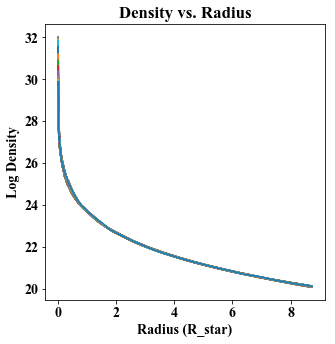

In [246]:
fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})
plt.title("Density vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Log Density")
plt.tight_layout()
for i in range(0,len(filenames1)): 
    plt.plot(data[i][1][:],np.log(data[i][3][:]))

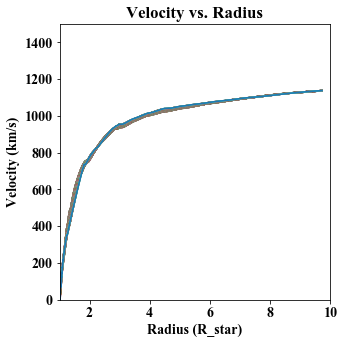

In [247]:
fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})
plt.title("Velocity vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Velocity (km/s)")
plt.xlim(1.0,10)
plt.ylim(0,1.5e3)
plt.tight_layout()
for i in range(0,len(filenames1)): 
    plt.plot(data[i][1][:]+1,(data[i][2][:])/10**5)
    

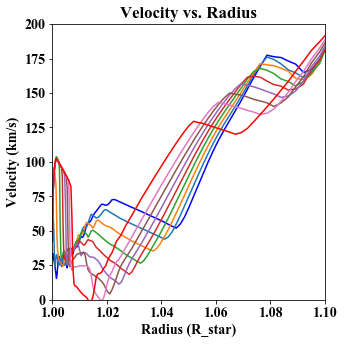

In [248]:
#First 10 timesteps
fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})
plt.title("Velocity vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Velocity (km/s)")
plt.xlim(1.0,1.1)
plt.ylim(0,2e2)
plt.tight_layout()
plt.plot(data[0][1][:]+1,(data[0][2][:])/10**5,color='b')
for i in range(1,8): 
    plt.plot(data[i][1][:]+1,(data[i][2][:])/10**5)
plt.plot(data[9][1][:]+1,(data[9][2][:])/10**5,color='r')

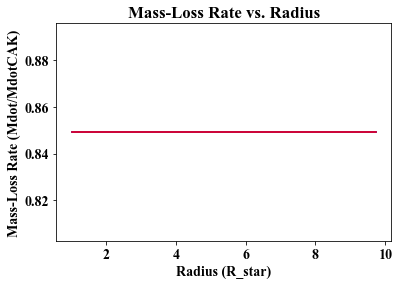

In [249]:
M_sun=(2e33)
yr=(365.25*24*3600)
Rstar=9.75e11

for i in range(0,len(filenames1)):
    Mdotcgs = (4*np.pi*(data[i][1][:]+1)**2*data[i][3][:]*data[i][2][:])
    MdotCAK=(Mdotcgs)/(1.34e-6*M_sun/yr)
    MdotR=(Mdotcgs/MdotCAK)*1e-20
    for j in range(1,8):
        plt.plot(data[j][1][:]+1,(MdotR))

plt.plot(data[0][1][:]+1,(MdotR),color='b')
    
plt.plot(data[9][1][:]+1,(MdotR),color='r')
#plt.xlim(1,1.10)
#plt.ylim(-1,1)
plt.title("Mass-Loss Rate vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Mass-Loss Rate (Mdot/MdotCAK)")
plt.show()

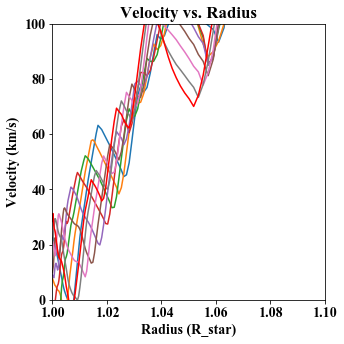

In [250]:
#Final 10 timesteps
fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})
plt.title("Velocity vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Velocity (km/s)")
plt.xlim(1.0,1.1)
plt.ylim(0,1e2)
plt.tight_layout()
plt.plot(data[91][1][:]+1,Mdotcgs/MdotCAK,color='b')
for i in range(len(filenames1)-9,len(filenames1)-1): 
    plt.plot(data[i][1][:]+1,(data[i][2][:])/10**5)
plt.plot(data[100][1][:]+1,(data[100][2][:])/10**5,color='r')

(0.0, 1500.0)

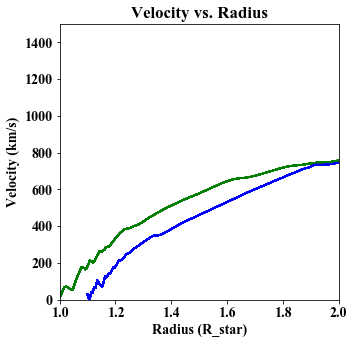

In [251]:
fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})
plt.title("Velocity vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Velocity (km/s)")
plt.tight_layout()
for i in range(0,len(filenames1)): 
    plt.plot(data[0][1][:]+1,(data[0][2][:])/10**5,color='g')
    plt.plot(data[100][1][:]+1.1,(data[100][2][:])/10**5,color='b')
plt.xlim(1.0,2)
plt.ylim(0e3,1.5e3)


In [252]:
#Definition of the Beta Velocity Law

def beta_velocity(x,beta,vi):

    return vi*(1-(1/x))**beta

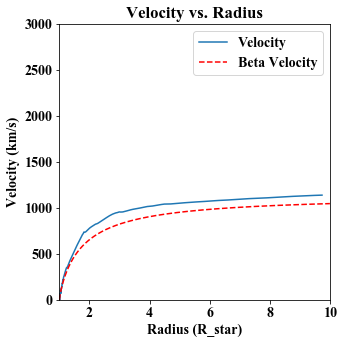

In [253]:
#Curve fitting our obtained velocity to that of the Beta Velocity Law
#popt shows our fitted values for our independent variable
#pcov shows the fitted covariance
beta=0.8
#popt, pcov = curve_fit(beta_velocity, data[i][1][:]+1, V,p0=[1.2,3.e8])

#prints values for our independent variables (vi and beta)

#print(popt[1])

#creates a variable that runs along a range of values (as obtained from our above velocity plot)

xval = np.linspace(1.,10.,901)

#creates a variable calculating the beta velocity over the array of xvval using the fitted values of vi and beta

yval = beta_velocity(xval, beta, 1138)


#plots the fitted results

fig=plt.figure(figsize=(5,5))

plt.plot(data[100][1][:]+1,(data[100][2][:])/10**5,label='Velocity')
plt.plot(xval,(yval),color='r',ls='--',label='Beta Velocity')
plt.title("Velocity vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Velocity (km/s)")
plt.legend(loc='best')
plt.xlim(1.0,10)
plt.ylim(0e3,3e3)
plt.tight_layout()

In [254]:
#calculates the mass-loss rate at a specific value in the file

#Mdot = (4*np.pi*(data[i][1][0:1]+1)**2*data[i][3][0:1]*data[30][2][0:1])


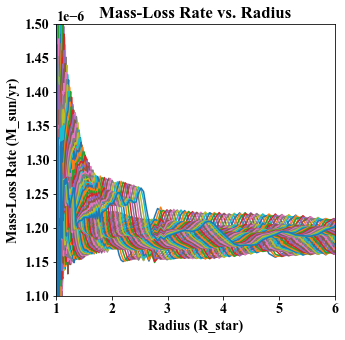

In [255]:
#Plots the mass-loss rate as a function of radius
M_sun = 2e33
yr=365.25*24*3600
#Mdot = (4*np.pi*(data[i][1][:]+1)**2*data[i][3][:]*data[i][2][:])

fig=plt.figure(figsize=(5,5))

for i in range(0,len(filenames1)): 
    Mdot = (4*np.pi*(data[i][1][:]+1)**2*data[i][3][:]*data[i][2][:])
    plt.plot(data[i][1][:]+1,(Mdot*yr)/M_sun)
#plt.plot(data[0][1][:]+1,(Mdot*yr)/M_sun,color='k')
#plt.plot(data[9][1][:]+1,(Mdot*yr)/M_sun,color='r')
plt.title("Mass-Loss Rate vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Mass-Loss Rate (M_sun/yr)")
plt.xlim(1.0,6)
plt.ylim(1.1e-6,1.5e-6)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#Mdot = (4*np.pi*(data[:][1][:]+1)**2*data[:][3][:]*data[:][2][:])
#print(Mdot)

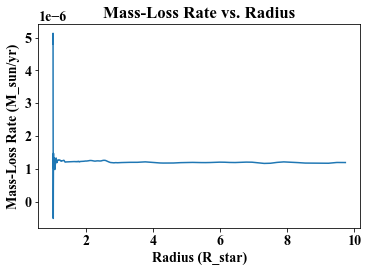

In [256]:
Mdot1 = (4*np.pi*(data[100][1][:]+1)**2*data[100][3][:]*data[100][2][:])
#for i in range(0,len(filenames)): 
plt.plot(data[100][1][:]+1,(Mdot1*yr)/M_sun)
    
plt.title("Mass-Loss Rate vs. Radius")
plt.xlabel("Radius (R_star)")
plt.ylabel("Mass-Loss Rate (M_sun/yr)")
#plt.xlim(1.0,1.2)
#plt.ylim(0e-6,4e-6)
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))